In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Datasets")
import matplotlib.pyplot as plt

In [2]:
passengers = pd.read_csv("AirPassengers.csv", index_col=0)
y = passengers['Passengers']

In [3]:
y_train = y[:132]
y_test = y[132:]
y_train.shape, y_test.shape

((132,), (12,))

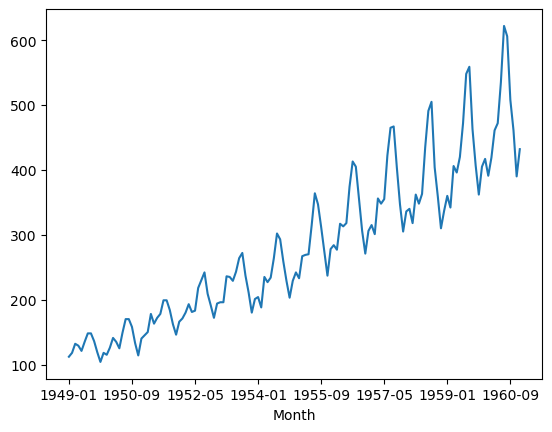

In [4]:
y.plot()
plt.show()

In [5]:
print(y_train.index)
print(y_test.index)

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1959-03', '1959-04', '1959-05', '1959-06', '1959-07', '1959-08',
       '1959-09', '1959-10', '1959-11', '1959-12'],
      dtype='object', name='Month', length=132)
Index(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
       '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month')


In [6]:
span=3
fcast = y_train.rolling(span,center=False).mean() 
fcast

Month
1949-01           NaN
1949-02           NaN
1949-03    120.666667
1949-04    126.333333
1949-05    127.333333
              ...    
1959-08    526.333333
1959-09    523.333333
1959-10    476.333333
1959-11    410.666667
1959-12    391.333333
Name: Passengers, Length: 132, dtype: float64

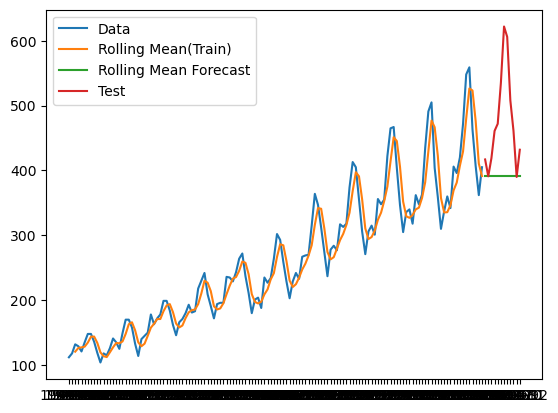

In [7]:
span=3
fcast = y_train.rolling(span,center=False).mean() 
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index)
plt.plot(y_train, label='Data')
plt.plot(fcast, label='Rolling Mean(Train)')
plt.plot(MA_fcast, label='Rolling Mean Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

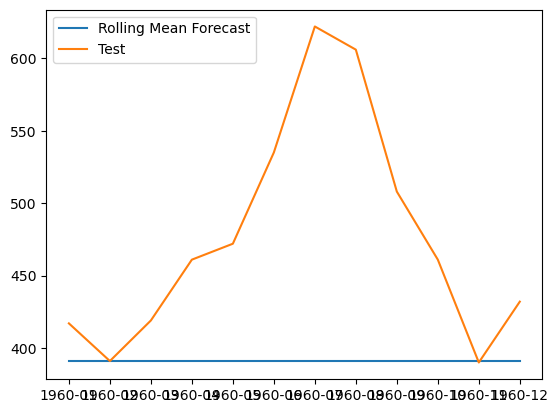

In [8]:
plt.plot(MA_fcast, label='Rolling Mean Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

In [9]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, MA_fcast)

112.85462625283321

In [10]:
span=7
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index)
root_mean_squared_error(y_test, MA_fcast)

76.28653914303472

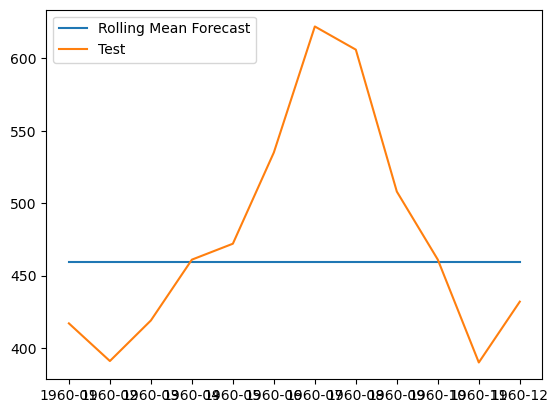

In [11]:
plt.plot(MA_fcast, label='Rolling Mean Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

## Simple Exponential Smoothing

In [13]:
from statsmodels.tsa.api import SimpleExpSmoothing
alpha=0.2
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


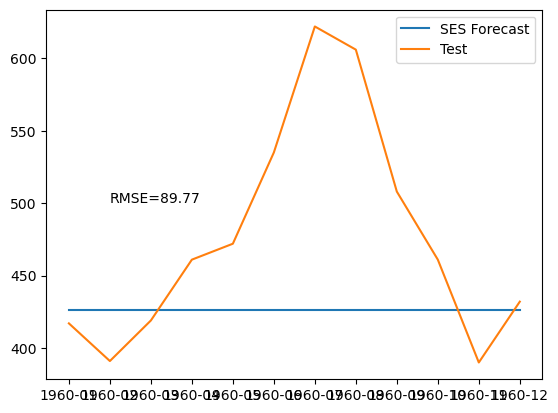

In [14]:
ses_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, ses_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(ses_fcast, label='SES Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

## Holt's Linear Trend

In [16]:
from statsmodels.tsa.api import Holt

In [17]:
holt = Holt(y_train)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


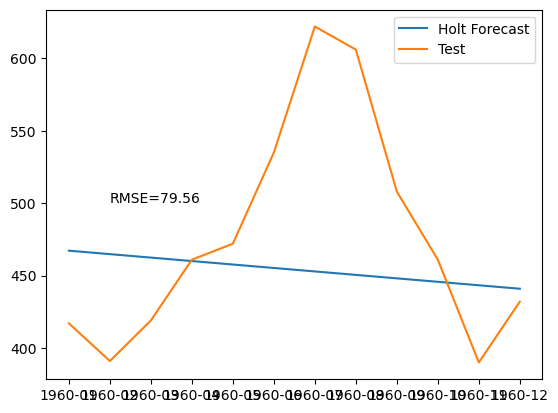

In [18]:
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(holt_fcast, label='Holt Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

## Holt's Exponential Trend

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


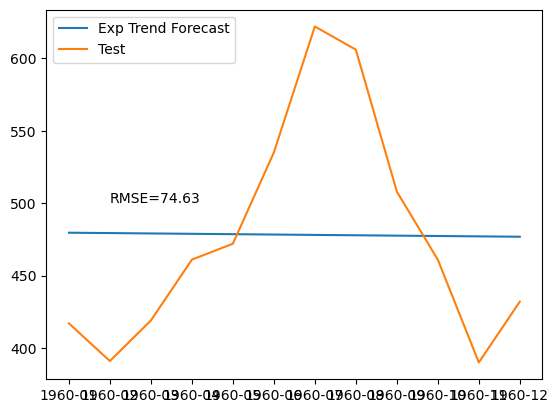

In [20]:
holt = Holt(y_train, exponential=True)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index=y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(holt_fcast, label='Exp Trend Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

## Additive Damped Trend

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


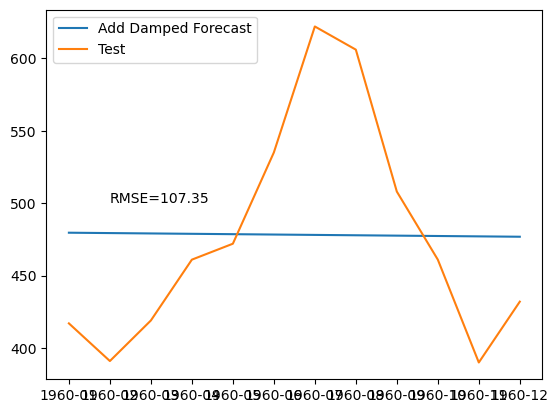

In [22]:
alpha, beta, phi= 0.8, 0.02, 0.1
add_damp = Holt(y_train, damped_trend=True)
fit3 = add_damp.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
fcast3 = fit3.forecast(len(y_test))
damp_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, damp_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(holt_fcast, label='Add Damped Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

## Multiplicative Damped Trend

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


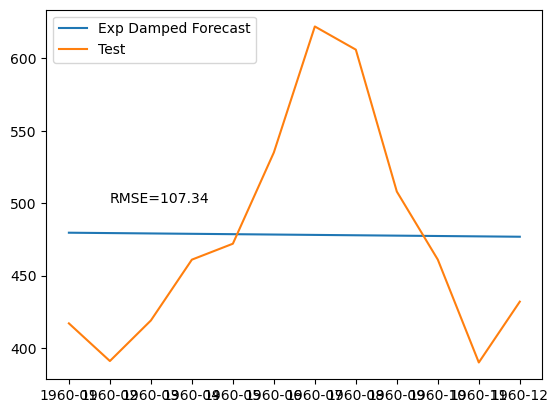

In [24]:
alpha, beta, phi= 0.8, 0.02, 0.1
add_damp = Holt(y_train, damped_trend=True, exponential=True)
fit3 = add_damp.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
fcast3 = fit3.forecast(len(y_test))
damp_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, damp_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(holt_fcast, label='Exp Damped Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

## Holt-Winters Additive Trend 

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


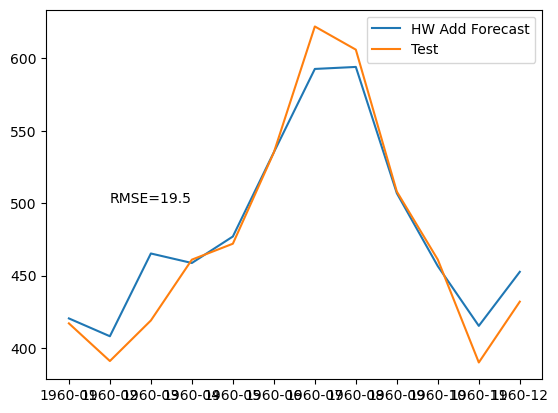

In [27]:
alpha, beta, gamma = 0.2, 0.1, 0.4
hw_a = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit3 = hw_a.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast3 = fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(hw_a_fcast, label='HW Add Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

Auto-Tuning

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


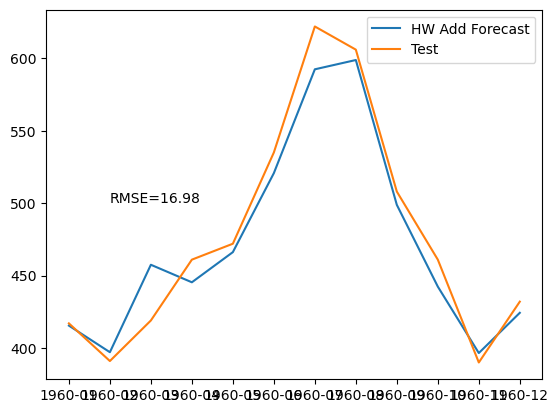

In [29]:
hw_a = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit3 = hw_a.fit()
fcast3 = fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(hw_a_fcast, label='HW Add Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

Best Parameters resulted through auto-tuning:

In [31]:
hw_a.params['smoothing_level'], hw_a.params['smoothing_trend'], hw_a.params['smoothing_seasonal']

(0.25114767770389806, 2.4205637611715785e-10, 0.7488523210955302)

## Holt-Winters Multiplicative Trend 

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


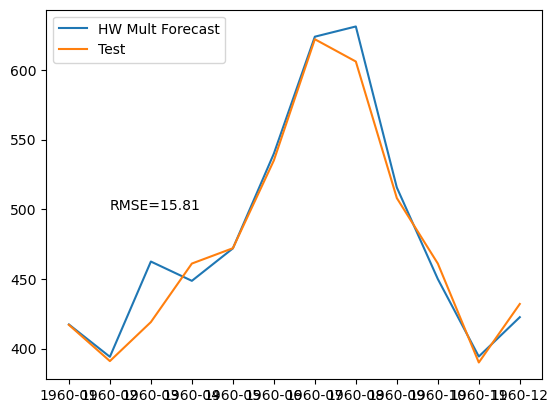

In [33]:
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(hw_m_fcast, label='HW Mult Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

Best Parameters resulted through auto-tuning:

In [35]:
hw_m.params['smoothing_level'], hw_m.params['smoothing_trend'], hw_m.params['smoothing_seasonal']

(0.37621783281586596, 6.186078249301716e-08, 0.6237821616779047)

## Damped + Holt-Winters

C:\Python\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


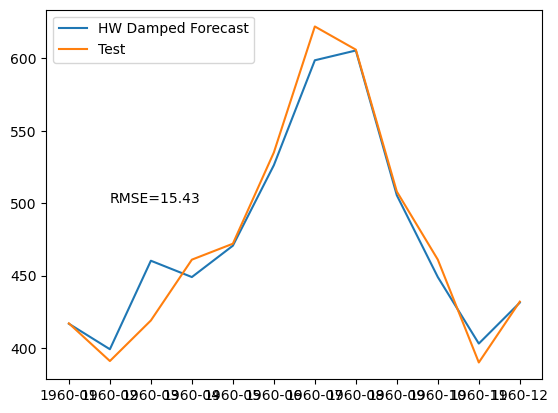

In [37]:
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add', damped_trend=True)
fit3 = hw_m.fit()
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index=y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(hw_m_fcast, label='HW Damped Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()